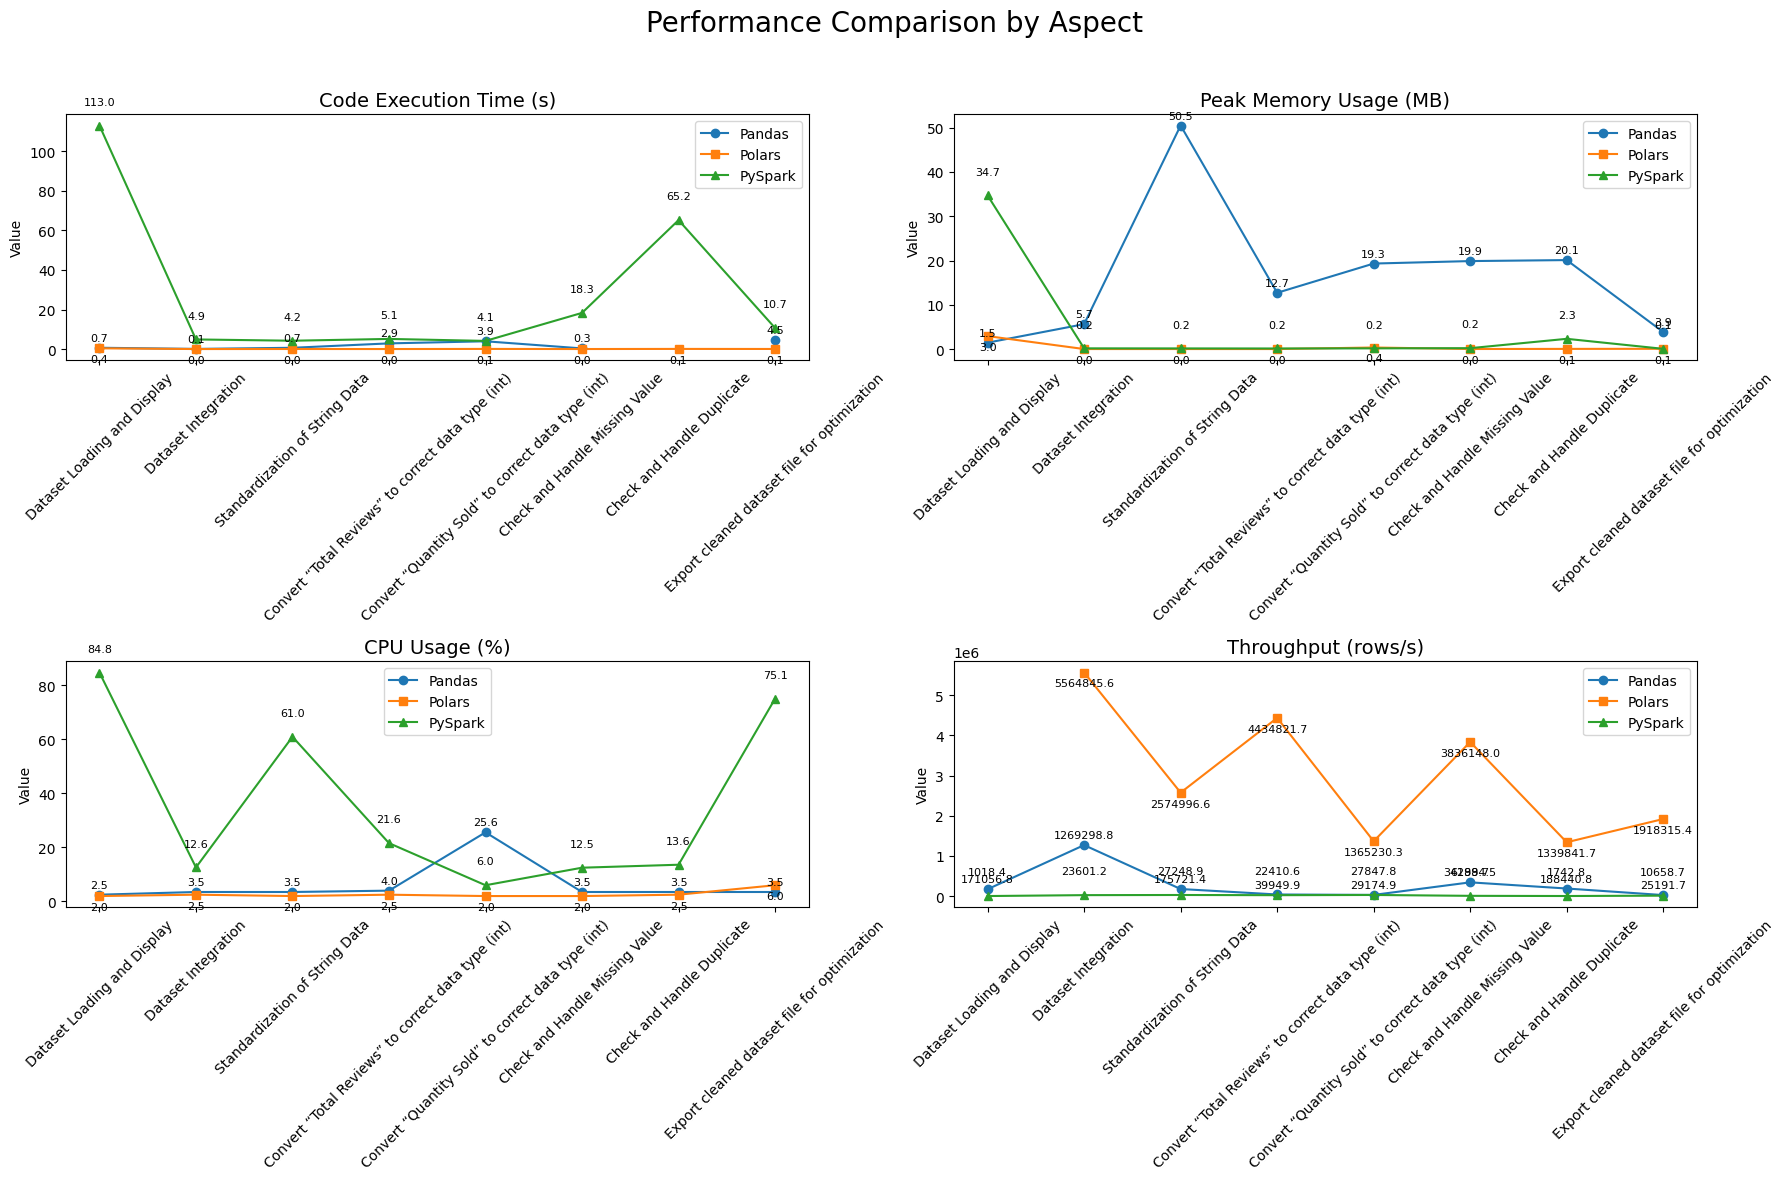

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
xls = pd.ExcelFile('Data for graph.xlsx')
pandas_df = pd.read_excel(xls, 'Pandas')
polars_df = pd.read_excel(xls, 'Polars')
pyspark_df = pd.read_excel(xls, 'PySpark')

# List of aspects to compare
aspects = ['Code Execution Time (s)', 'Peak Memory Usage (MB)', 'CPU Usage (%)', 'Throughput (rows/s)']

# Convert all relevant columns to numeric (coerce errors into NaN)
for aspect in aspects:
    pandas_df[aspect] = pd.to_numeric(pandas_df[aspect], errors='coerce')
    polars_df[aspect] = pd.to_numeric(polars_df[aspect], errors='coerce')
    pyspark_df[aspect] = pd.to_numeric(pyspark_df[aspect], errors='coerce')

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
offsets = {'Pandas': 5, 'Polars': -10, 'PySpark': 15}

# Plot each aspect
for i, aspect in enumerate(aspects):
    ax = axs[i//2, i%2]
    
    ops = pandas_df['Operation']
    
    ax.plot(ops, pandas_df[aspect], marker='o', label='Pandas')
    ax.plot(ops, polars_df[aspect], marker='s', label='Polars')
    ax.plot(ops, pyspark_df[aspect], marker='^', label='PySpark')
    
    ax.set_title(aspect, fontsize=14)
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

    # Value annotations with staggered positions
    for x, y in zip(ops, pandas_df[aspect]):
        if pd.notnull(y):
            ax.annotate(f'{y:.1f}', xy=(x, y), textcoords="offset points", xytext=(0, offsets['Pandas']), ha='center', fontsize=8)
    for x, y in zip(ops, polars_df[aspect]):
        if pd.notnull(y):
            ax.annotate(f'{y:.1f}', xy=(x, y), textcoords="offset points", xytext=(0, offsets['Polars']), ha='center', fontsize=8)
    for x, y in zip(ops, pyspark_df[aspect]):
        if pd.notnull(y):
            ax.annotate(f'{y:.1f}', xy=(x, y), textcoords="offset points", xytext=(0, offsets['PySpark']), ha='center', fontsize=8)

fig.suptitle('Performance Comparison by Aspect', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
